## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
results_combined = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
results_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
results_combined["Mouse ID"].value_counts()

g989    13
r944    10
e213    10
b559    10
a262    10
        ..
n482     1
d133     1
x226     1
o848     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = results_combined.loc[results_combined["Mouse ID"] == "g989", :]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
results_cleaned = results_combined.loc[results_combined["Mouse ID"] != "g989", :]
results_cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
results_cleaned["Mouse ID"].value_counts()

r944    10
a401    10
b559    10
a262    10
k862    10
        ..
n482     1
x226     1
d133     1
f932     1
v199     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

results_group = results_cleaned.groupby("Drug Regimen")

tumor_mean = results_group["Tumor Volume (mm3)"].mean()

tumor_median = results_group["Tumor Volume (mm3)"].median()

tumor_var = results_group["Tumor Volume (mm3)"].var()

tumor_std = results_group["Tumor Volume (mm3)"].std()

tumor_sem = results_group["Tumor Volume (mm3)"].sem()

data_summary = pd.DataFrame({"mean": tumor_mean,
                             "median": tumor_median,
                             "variance": tumor_var,
                             "standard deviation": tumor_std,
                             "standard error": tumor_sem})

data_summary


,mean,median,variance,standard deviation,standard error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
data_summary_agg = results_group["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
data_summary_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

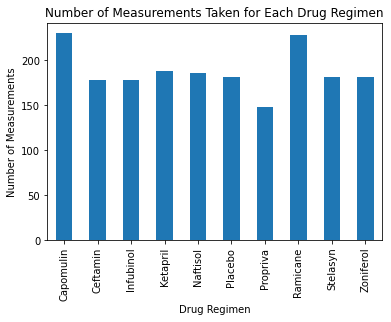

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_data = results_group["Tumor Volume (mm3)"].count()
count_chart = count_data.plot(kind="bar")
plt.title("Number of Measurements Taken for Each Drug Regimen")
plt.ylabel("Number of Measurements")
plt.show()

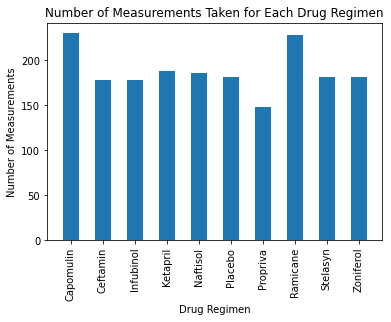

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs = count_data.keys()

plt.bar(drugs, count_data, width=0.5)
plt.title("Number of Measurements Taken for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.xticks(drugs, rotation="vertical")
plt.show()

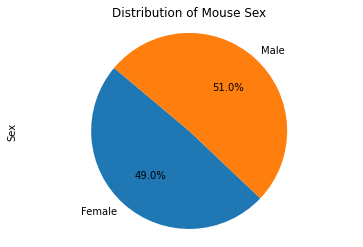

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex_group = results_cleaned.groupby("Sex")
mouse_sex_count = mouse_sex_group["Sex"].count()

mouse_sex_count.plot(kind="pie", title="Distribution of Mouse Sex", startangle=140, autopct="%1.1f%%")
plt.axis("equal")
plt.show()

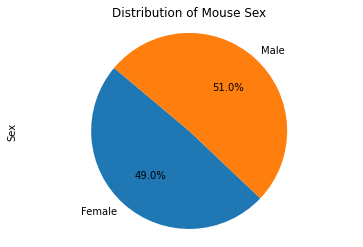

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plot_labels = mouse_sex_count.keys()

plt.pie(mouse_sex_count, labels=plot_labels, startangle=140, autopct="%1.1f%%")
plt.title("Distribution of Mouse Sex")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_group = results_cleaned.groupby("Mouse ID")
max_timepoint = mouse_group["Timepoint"].max()
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_tumor_vol = pd.merge(results_cleaned, max_timepoint, on=["Mouse ID", "Timepoint"])
last_tumor_vol

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes    
for treatment in treatment_list:
    tumor_vol_data.append(last_tumor_vol.loc[last_tumor_vol["Drug Regimen"] == treatment, "Tumor Volume (mm3)"])
    
    # add subset 
final_tumor_vol = pd.DataFrame({"Capomulin": tumor_vol_data[0],
                                "Ramicane": tumor_vol_data[1],
                                "Infubinol": tumor_vol_data[2],
                                "Ceftamin": tumor_vol_data[3]})
final_tumor_vol

    # Determine outliers using upper and lower bounds
lowerq = final_tumor_vol.quantile(0.25)
upperq = final_tumor_vol.quantile(0.75)
iqr = upperq - lowerq

upper_bound = upperq + 1.5 * iqr
lower_bound = lowerq - 1.5 * iqr

outliers = final_tumor_vol[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
outliersdf = outliers.dropna(how="all")
outliersdf

,Capomulin,Ramicane,Infubinol,Ceftamin
74,NaN,NaN,36.321346,NaN


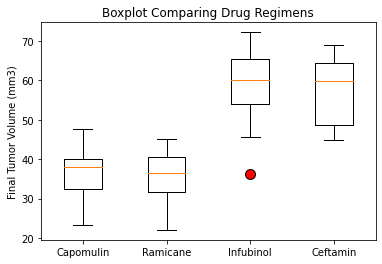

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_circle = dict(markerfacecolor="red", marker="o", markersize=10)
plt.boxplot(tumor_vol_data, flierprops=red_circle)
plt.title("Boxplot Comparing Drug Regimens")
tick_locations = [1, 2, 3, 4]
plt.xticks(tick_locations, treatment_list)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

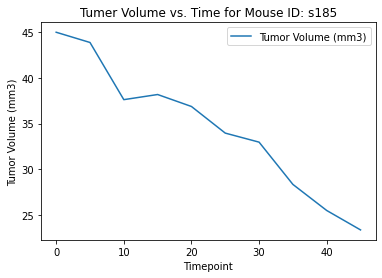

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouseID = "s185"
line_plot_data = results_cleaned.loc[results_cleaned["Mouse ID"] == mouseID, :]
line_plot_data.plot("Timepoint", "Tumor Volume (mm3)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumer Volume vs. Time for Mouse ID: {mouseID}")
plt.show()

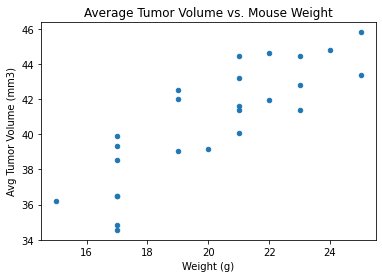

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_plot_group = results_cleaned.loc[results_cleaned["Drug Regimen"] == "Capomulin", :].groupby("Mouse ID")
scatter_plot_data = scatter_plot_group.mean()
scatter_plot_data.plot("Weight (g)", "Tumor Volume (mm3)", kind="scatter")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight = scatter_plot_data.loc[:, "Weight (g)"]
volume = scatter_plot_data.loc[:, "Tumor Volume (mm3)"]

correlation = st.pearsonr(weight, volume)
print(f"The correlation between mouse weight and tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and tumor volume is 0.84


The r squared value is 0.71


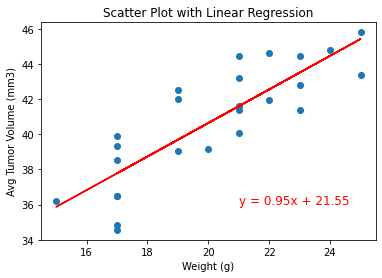

In [19]:
x_values = weight
y_values = volume
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values) # x values in first
regress_values = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Scatter Plot with Linear Regression")
plt.annotate(line_eq,(21, 36),fontsize=12,color="red")
r_squared = round(rvalue**2, 2)
print(f"The r squared value is {r_squared}")
plt.show()